## Import Dependencies

In [74]:
!pip install pytest pytest-sugar

In [75]:
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.stats import t

## Binary Search Tree (BST) Classes

Down below there are some useful classes for creating and managing a Binary Search Tree (BST). The code defines two main classes: `Node`, which represents the individual nodes of the tree, and `BST`, which handles the overall tree structure. It includes methods for adding elements, checking if a value exists, and visualizing the tree using Plotly. This implementation is designed for efficiency and supports recursive operations for tree traversal and management.

*The **`%%file`** magic command in Jupyter is used to save the implementation in a separate Python file.*

In [76]:
%%file binarysearchtree.py

class Node:
  """
  A class representing a node in a binary search tree.

  Attributes:
  - value: the value of the node
  - left_child: the left child of the node
  - right_child: the right child of the node
  """

  def __init__(self, value):
      """
      Initializes a new instance of the Node class.

      Args:
      - value: the value of the node
      """
      self.value = value
      self.left_child = None
      self.right_child = None


class BST:
  """
  A class representing a binary search tree.

  Attributes:
  - root: the root node of the tree
  """

  def __init__(self):
      """
      Initializes a new instance of the BST class.
      """
      self.root = None

  def add(self, value):
      """
      Adds a new node with the given value to the tree.

      Args:
      - value: the value of the node to add
      """
      if self.root is None:
          # The root does exist yet, create it
          self.root = Node(value)
      else:
          # Find the right place and insert new value
          self._add_recursive(self.root, value)

  def _add_recursive(self, current_node, value):
      """
      A helper method to recursively traverse the tree and find the correct position to add the new node.

      Args:
      - current_node: the current node to traverse
      - value: the value of the node to add
      """
      if value <= current_node.value:
          # Go to the left
          if current_node.left_child is None:
              current_node.left_child = Node(value)
          else:
              self._add_recursive(current_node.left_child, value)
      else:
          # Go to the right
          if current_node.right_child is None:
              current_node.right_child = Node(value)
          else:
              self._add_recursive(current_node.right_child, value)

  def _contains(self, current_node, value):
      """
      A helper method to recursively traverse the tree and find the node with the given value.

      Args:
      - current_node: the current node to traverse
      - value: the value to search for

      Returns:
      - True if a node with the given value is found, False otherwise
      """
      if current_node is None:
          return False
      if current_node.value == value:
          return True
      if value < current_node.value:
          return self._contains(current_node.left_child, value)
      return self._contains(current_node.right_child, value)

  def contains(self, value):
      """
      Checks whether a node with the given value is present in the tree.

      Args:
      - value: the value to search for

      Returns:
      - True if a node with the given value is found, False otherwise
      """
      return self._contains(self.root, value)

  def plot(self):
      """
      Plots the binary search tree using Plotly.
      """
      if self.root is None:
          print("The tree is empty!")
          return

      # Initialize lists for coordinates and connections
      node_coords = []
      lines = []

      # Helper function to traverse the tree and fill the coordinate and connection lists
      def _plot_recursive(node, x, y, offset):
          if node is not None:
              node_coords.append((x, y, node.value))
              if node.left_child is not None:
                  new_x = x - offset
                  new_y = y - 1
                  lines.append((x, y, new_x, new_y))
                  _plot_recursive(node.left_child, new_x, new_y, offset / 2)
              if node.right_child is not None:
                  new_x = x + offset
                  new_y = y - 1
                  lines.append((x, y, new_x, new_y))
                  _plot_recursive(node.right_child, new_x, new_y, offset / 2)

      # Traverse the tree starting from the root node
      _plot_recursive(self.root, x=0, y=0, offset=0.5)

      # Create a scatter plot for the nodes
      node_trace = go.Scatter(x=[x for x, y, _ in node_coords],
                              y=[y for _, y, _ in node_coords],
                              text=[str(val) for _, _, val in node_coords],
                              mode='markers+text',
                              textposition='top center',
                              marker=dict(symbol='circle',
                                          size=20,
                                          color='darkblue'))

      # Create a scatter plot for the connections between nodes
      line_trace = go.Scatter(x=sum([[x1, x2, None] for x1, y1, x2, y2 in lines], []),
                              y=sum([[y1, y2, None] for x1, y1, x2, y2 in lines], []),
                              mode='lines',
                              line=dict(color='black'))

      # Combine the two scatter plots
      layout = go.Layout(title='',
                          xaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                          yaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                          showlegend=False)

      fig = go.Figure(data=[node_trace, line_trace], layout=layout)
      fig.show()

Overwriting binarysearchtree.py


## Closest Value

The next code provides a function to find the value in a Binary Search Tree (BST) that is closest to a given **target** value. The implementation consists of a helper function, findClosestValueInBstHelper, which recursively explores the tree nodes and updates the closest value based on the absolute difference between the target and the current node's value.

The main function, findClosestValue, acts as an entry point, starting the search from the root of the tree. The use of recursion ensures an efficient traversal of the BST.


In [77]:
%%file closestvalue.py
# Example usage:

def findClosestValue(tree, target):
    return findClosestValueInBstHelper(tree.root, target, tree.root.value)

def findClosestValueInBstHelper(node, target, closest):
    if node is None:
        return closest
    if abs(target - closest) > abs(target - node.value):
        closest = node.value
    if target < node.value:
        return findClosestValueInBstHelper(node.left_child, target, closest)
    elif target > node.value:
        return findClosestValueInBstHelper(node.right_child, target, closest)
    else:
        return closest


Overwriting closestvalue.py


## Largest Value

The following code defines a function to find the **k** *kth largest* value in a Binary Search Tree (BST). The implementation relies on an auxiliary function, `inOrderTraverse`, which performs an in-order traversal of the tree to generate a sorted list of node values.

The main function, `findKthLargestValue`, computes the result by accessing the appropriate index from this sorted list. The approach ensures that the values are processed in ascending order, making it easy to identify the desired kth largest element.

In [78]:
%%file largestvalue.py

def findKthLargestValue(tree, k):
    sortedNodeValues = []
    inOrderTraverse(tree.root,sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]

def inOrderTraverse(node, sortedNodeValues):
    if node is None:
        return

    inOrderTraverse(node.left_child, sortedNodeValues)
    sortedNodeValues.append(node.value)
    inOrderTraverse(node.right_child, sortedNodeValues)


Overwriting largestvalue.py


## Algorithm Performance Testing

The code evaluates the **performance** of the algorithms `findClosestValue`, which identifies the closest value to a target in a Binary Search Tree (BST), and `findKthLargestValue`, which retrieves the kth largest value from the same tree. The analysis is conducted across a range of input sizes to examine how the algorithms scale with increasing data.

To accurately estimate the average execution time for each algorithm, multiple runs (`executions_per_size`) are performed for each input size. Averaging these runs minimizes the impact of random **fluctuations**, such as those caused by system noise or temporary resource constraints.

The **confidence intervals** are calculated to quantify the reliability of the measured execution times. These intervals represent the range within which the true average execution time lies with 95% confidence. They are computed using the standard deviation of the times and the Student's t-distribution, with smaller intervals indicating higher measurement reliability.

The size of the input vector (`vector_sizes`) is varied to evaluate the impact of input size on execution time. This variation helps in understanding the time **complexity** of the algorithms, offering insights into their efficiency across different data scales.


In [82]:
from binarysearchtree import *
from largestvalue import findKthLargestValue
from closestvalue import findClosestValue

# Configs
np.random.seed(42)
N = 100000
steps = 10
executions_per_size = 100

vector_sizes = np.linspace(100, N, steps, dtype=int)

# Vectors to data collection
results_closest = []
results_kth_largest = []
confidence_intervals_closest = []
confidence_intervals_kth_largest = []

# Test the algorithms
for size in vector_sizes:
    times_closest = []
    times_kth_largest = []

    # Create test datatest
    target = np.random.randint(250, 500)
    data = np.random.randint(0, 1000, size)

    bst = BST()
    for value in data:
        bst.add(value)

    for _ in range(executions_per_size):
        # Measure time for solver_closest
        start = time()
        findClosestValue(bst, target)
        times_closest.append(time() - start)

        # Measure time for solver_kth_largest
        start = time()
        findKthLargestValue(bst, k=5)
        times_kth_largest.append(time() - start)

    # Calculate the avarage time and confidence interval (95%)
    mean_closest = np.mean(times_closest)
    mean_kth_largest = np.mean(times_kth_largest)

    std_closest = np.std(times_closest, ddof=1)
    std_kth_largest = np.std(times_kth_largest, ddof=1)

    ci_closest = t.ppf(0.975, executions_per_size-1) * (std_closest / np.sqrt(executions_per_size))
    ci_kth_largest = t.ppf(0.975, executions_per_size-1) * (std_kth_largest / np.sqrt(executions_per_size))

    results_closest.append(mean_closest)
    results_kth_largest.append(mean_kth_largest)

    confidence_intervals_closest.append(ci_closest)
    confidence_intervals_kth_largest.append(ci_kth_largest)

### Visualization

The results are plotted using error bars to visualize the average execution times alongside their confidence intervals. This allows for a clear comparison of the algorithms' performance and their variability across different input sizes.

By combining repeated runs, confidence intervals, and varying input sizes, this approach provides a robust evaluation of algorithm efficiency and scalability.

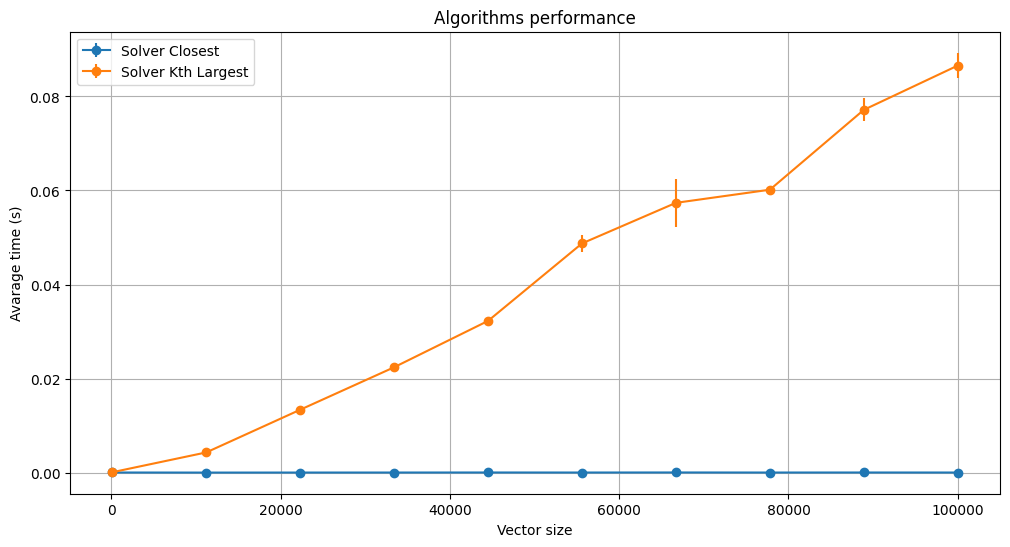

In [83]:
# Make graphic
plt.figure(figsize=(12, 6))
plt.errorbar(vector_sizes, results_closest, yerr=confidence_intervals_closest, label='Solver Closest', fmt='-o')
plt.errorbar(vector_sizes, results_kth_largest, yerr=confidence_intervals_kth_largest, label='Solver Kth Largest', fmt='-o')
plt.xlabel('Vector size')
plt.ylabel('Avarage time (s)')
plt.title('Algorithms performance')
plt.legend()
plt.grid(True)
plt.show()

#### Observations

*  **Solver Closest**  
   The execution time of `Solver Closest` remains constant as the input size increases. This behavior suggests that the algorithm operates in **O(1)** time complexity .

*  **Solver Kth Largest**  
   In contrast, the execution time of `Solver Kth Largest` grows linearly with the input size even with some unexpected values of time which escape the linear behavior due fluctuations. This trend indicates that its time complexity is **O(N)**, likely because the implementation involves traversing the entire BST to identify the kth largest element.
